In [1]:
pip install pandas scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
tracks = pd.read_csv("tracks.csv" , index_col = 0, header = [0, 1])
features = pd.read_csv("features.csv", index_col = 0)
genre = tracks[("track", "genre_top")]
#removed the things which are not required right now
genre_df = genre.reset_index(name = "genre")
print(genre_df.head())

C:\Users\Administrator\AppData\Local\Temp\ipykernel_14444\1320326141.py:2: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,

   track_id    genre
0         2  Hip-Hop
1         3  Hip-Hop
2         5  Hip-Hop
3        10      Pop
4        20      NaN


In [4]:
genre_counts = genre_df['genre'].value_counts()
print(genre_counts)

genre
Rock                   14182
Experimental           10608
Electronic              9372
Hip-Hop                 3552
Folk                    2803
Pop                     2332
Instrumental            2079
International           1389
Classical               1230
Jazz                     571
Old-Time / Historic      554
Spoken                   423
Country                  194
Soul-RnB                 175
Blues                    110
Easy Listening            24
Name: count, dtype: int64


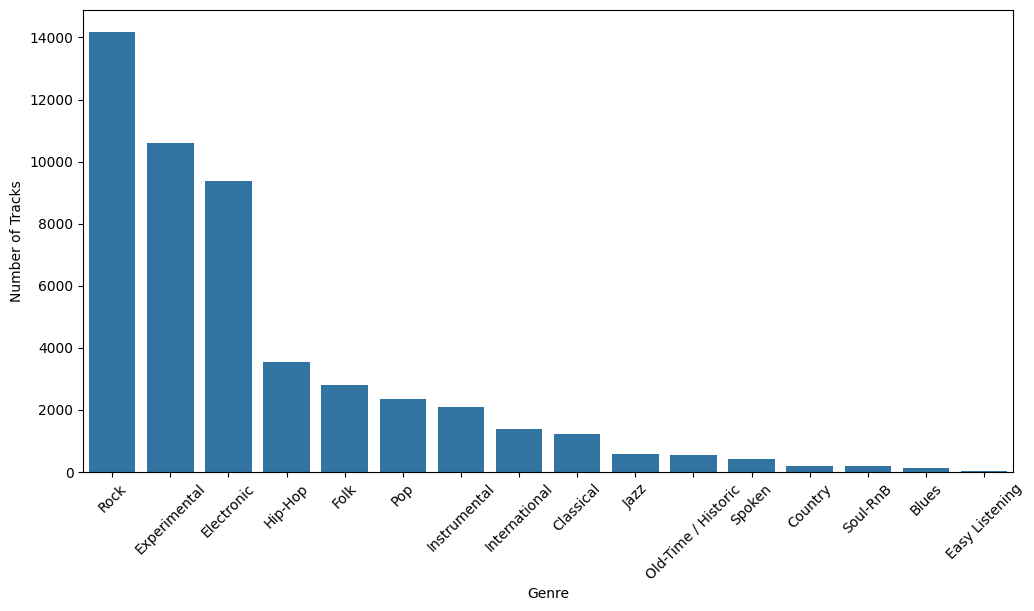

In [5]:
plt.figure(figsize=(12,6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.xticks(rotation=45)
plt.xlabel("Genre")
plt.ylabel("Number of Tracks")
plt.show()

In [6]:
features = pd.read_csv("features.csv", index_col = 0)
tracks_filtered = tracks[tracks[("set", "subset")] == "small"]
tracks_id = tracks_filtered.index
features_filtered = features.reindex(tracks_id)
features_df = features_filtered.reset_index()
print(features_df.head())

C:\Users\Administrator\AppData\Local\Temp\ipykernel_14444\2069512972.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,

   track_id chroma_cens chroma_cens.1 chroma_cens.2 chroma_cens.3  \
0         2         NaN           NaN           NaN           NaN   
1         5         NaN           NaN           NaN           NaN   
2        10         NaN           NaN           NaN           NaN   
3       140         NaN           NaN           NaN           NaN   
4       141         NaN           NaN           NaN           NaN   

  chroma_cens.4 chroma_cens.5 chroma_cens.6 chroma_cens.7 chroma_cens.8  ...  \
0           NaN           NaN           NaN           NaN           NaN  ...   
1           NaN           NaN           NaN           NaN           NaN  ...   
2           NaN           NaN           NaN           NaN           NaN  ...   
3           NaN           NaN           NaN           NaN           NaN  ...   
4           NaN           NaN           NaN           NaN           NaN  ...   

  tonnetz.39 tonnetz.40 tonnetz.41  zcr zcr.1 zcr.2 zcr.3 zcr.4 zcr.5 zcr.6  
0        NaN        NaN   

In [7]:
print(genre_df.isnull().sum())
genre_df = genre_df.dropna(subset=["genre"])

track_id        0
genre       56976
dtype: int64


In [8]:
print(features_df.isnull().sum())
# features_df = features_df.fillna(features_df.mean()) the value which was coming using mean was reducing the score by around 4% so using median
features_df = features_df.fillna(features_df.median())

track_id          0
chroma_cens      82
chroma_cens.1    82
chroma_cens.2    82
chroma_cens.3    82
                 ..
zcr.2            82
zcr.3            82
zcr.4            82
zcr.5            82
zcr.6            82
Length: 519, dtype: int64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_14444\769216012.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  features_df = features_df.fillna(features_df.median())


In [11]:
features_df.set_index('track_id', inplace=True)
genre_df.set_index('track_id', inplace=True)

common_id = features_df.index.intersection(genre_df.index)
features_df = features_df.loc[common_id]
genre_df = genre_df.loc[common_id]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(features_df, genre_df.values, test_size = 0.2, random_state = 42)

X_train = X_train.astype(float)
y_train = y_train.flatten()

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(random_state=42))
])

In [13]:
print("Training the model")
pipeline.fit(X_train, y_train)

print("Making predictions")
y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

Training the model
Making predictions
Accuracy: 0.6006

Classification Report:
               precision    recall  f1-score   support

   Electronic       0.54      0.62      0.58       184
 Experimental       0.49      0.54      0.52       200
         Folk       0.65      0.68      0.66       182
      Hip-Hop       0.66      0.65      0.65       221
 Instrumental       0.65      0.63      0.64       194
International       0.75      0.63      0.68       213
          Pop       0.41      0.38      0.39       196
         Rock       0.66      0.67      0.67       210

     accuracy                           0.60      1600
    macro avg       0.60      0.60      0.60      1600
 weighted avg       0.60      0.60      0.60      1600

